In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

# Section 1: Data loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trung Tâm Tin Học/Projects/Supervised Machine Learning/Regression/Graduate Admission/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Input:

*   Serial No.: Categorical variable (Nominal)
*   GRE Score: Numerical variable (Discrete)
*   TOEFL Score: Numerical variable (Discrete)
*   University Rating: Categorical variable (Ordinal)
*   SOP: Numerical variable (Continuous)
*   LOR: Numerical variable (Continuous)
*   CGPA: Numerical variable (Continuous)
*   Reseach: Categorical variable (Nominal)

Output:
*   Chance of Admit: Numerical variable (Continuous)

# Section 2: Data Preprocessing

In [ ]:
df.columns = ['serial_no','gre_score','toefl_score','university_rating','sop','lor','cgpa','research','chance_of_admit']
df.head()

,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
  # Identify null values and duplicates
df.isnull().any()

serial_no            False
gre_score            False
toefl_score          False
university_rating    False
sop                  False
lor                  False
cgpa                 False
research             False
chance_of_admit      False
dtype: bool

In [ ]:
df.duplicated().any()

False

There's no null value or duplicated value

In [ ]:
df.head(10)

,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaling = StandardScaler()
gre_score_values = df['gre_score'].values.reshape(-1,1)
df['gre_score_scaled'] = scaling.fit_transform(gre_score_values)
df[['gre_score','gre_score_scaled']][:5]

,gre_score,gre_score_scaled
0,337,1.819238
1,324,0.667148
2,316,-0.041830
3,322,0.489904
4,314,-0.219074


In [ ]:
scaling = StandardScaler()
toefl_score_values = df['toefl_score'].values.reshape(-1,1)
df['toefl_score_scaled'] = scaling.fit_transform(toefl_score_values)
df[['toefl_score','toefl_score_scaled']][:5]

,toefl_score,toefl_score_scaled
0,118,1.778865
1,107,-0.031601
2,104,-0.525364
3,110,0.462163
4,103,-0.689952


In [ ]:
df.drop(['gre_score','toefl_score','serial_no'],axis=1,inplace=True)

In [ ]:
df.head()

,university_rating,sop,lor,cgpa,research,chance_of_admit,gre_score_scaled,toefl_score_scaled
0,4,4.5,4.5,9.65,1,0.92,1.819238,1.778865
1,4,4.0,4.5,8.87,1,0.76,0.667148,-0.031601
2,3,3.0,3.5,8.00,1,0.72,-0.041830,-0.525364
3,3,3.5,2.5,8.67,1,0.80,0.489904,0.462163
4,2,2.0,3.0,8.21,0,0.65,-0.219074,-0.689952


In [ ]:
  # define data type for all column
df['university_rating'] = df['university_rating'].astype('category')
df['research'] = df['research'].astype('category')

df['sop'] = df['sop'].astype(float)
df['lor'] = df['lor'].astype(float)
df['cgpa'] = df['cgpa'].astype(float)
df['chance_of_admit'] = df['chance_of_admit'].astype(float)
df['gre_score_scaled'] = df['gre_score_scaled'].astype(float)
df['toefl_score_scaled'] = df['toefl_score_scaled'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   university_rating   500 non-null    category
 1   sop                 500 non-null    float64 
 2   lor                 500 non-null    float64 
 3   cgpa                500 non-null    float64 
 4   research            500 non-null    category
 5   chance_of_admit     500 non-null    float64 
 6   gre_score_scaled    500 non-null    float64 
 7   toefl_score_scaled  500 non-null    float64 
dtypes: category(2), float64(6)
memory usage: 24.9 KB


# Section 3: Univariate Analysis

## Categorical

In [ ]:
cat_cols = df.select_dtypes('category').columns.tolist()
cat_cols

['university_rating', 'research']

In [ ]:
type(cat_cols)

list

In [ ]:
for column in cat_cols:
  print('\n* Column: ', column)
  print(len(df[column].unique()),' unique values')


* Column:  university_rating
5  unique values

* Column:  research
2  unique values


In [ ]:
def univariate_analysis_categorical_variable(df, group_by_col):
  print(df[group_by_col].value_counts())
  df[group_by_col].value_counts().plot.bar(figsize=(3,4),rot=0)
  plt.show()


* Variable:  university_rating
3    162
2    126
4    105
5     73
1     34
Name: university_rating, dtype: int64


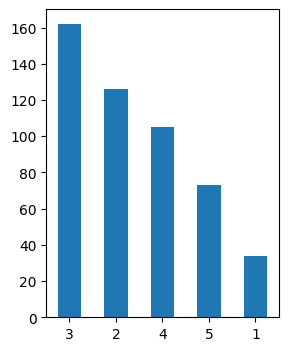



* Variable:  research
1    280
0    220
Name: research, dtype: int64


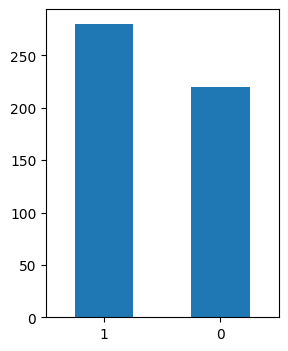

In [ ]:
for col in cat_cols:
  print('\n* Variable: ',col)
  univariate_analysis_categorical_variable(df,col)
  print()

**Comment:**

  * **university_rating:** Most students have the 3rd rating, surprisingly, the number of students achived 2nd rating is higher than those of 4th rating. The 1st rating is unachievable for most pupils
  * **research:** Students who have research experience show a higher number compared to those do not

## Numerical

In [ ]:
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

['sop',
 'lor',
 'cgpa',
 'chance_of_admit',
 'gre_score_scaled',
 'toefl_score_scaled']

In [ ]:
for col in num_cols:
  print('\n* Column: ',col)
  print(len(df[col].unique()), 'unique values')


* Column:  sop
9 unique values

* Column:  lor
9 unique values

* Column:  cgpa
184 unique values

* Column:  chance_of_admit
61 unique values

* Column:  gre_score_scaled
49 unique values

* Column:  toefl_score_scaled
29 unique values


In [ ]:
def univariate_analysis_numerical_variable(df, feature):
  print('Describe: ')
  print(feature.describe(include='all'))
  print('Mode: ',feature.mode())
  print('Range: ',feature.values.ptp())
  print('IQR: ',scipy.stats.iqr(feature))
  print('Variance: ', feature.var())
  print('Standard Deviation: ', feature.std())
  print('Skew: ', feature.skew())
  print('Kurtosis: ', feature.kurtosis())
  feature.plot.kde()
  plt.show()
  feature.plot.hist()
  plt.show()

In [ ]:
def check_outliers(df, feature):
  plt.boxplot(feature)
  plt.show()
  Q1 = np.percentile(feature,25)
  Q3 = np.percentile(feature,75)
  number_upper_outlier = df[feature > (Q3 + 1.5*scipy.stats.iqr(feature))].shape[0]
  number_lower_outlier = df[feature < (Q1 - 1.5*scipy.stats.iqr(feature))].shape[0]
  print('Number of upper outliers: ', number_upper_outlier)
  print('Number of lower outliers: ',number_lower_outlier)
  outliers_per = (number_upper_outlier + number_lower_outlier)/df.shape[0]
  print('Percentage of outliers: ',outliers_per)
  return Q1,Q3,number_upper_outlier,number_lower_outlier,outliers_per

Variable:  sop
Describe: 
count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: sop, dtype: float64
Mode:  0    4.0
Name: sop, dtype: float64
Range:  4.0
IQR:  1.5
Variance:  0.9820881763527054
Standard Deviation:  0.9910036207566072
Skew:  -0.22897239628779945
Kurtosis:  -0.7057169536396795


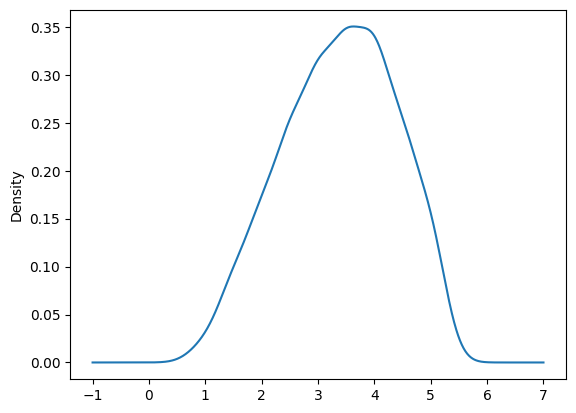

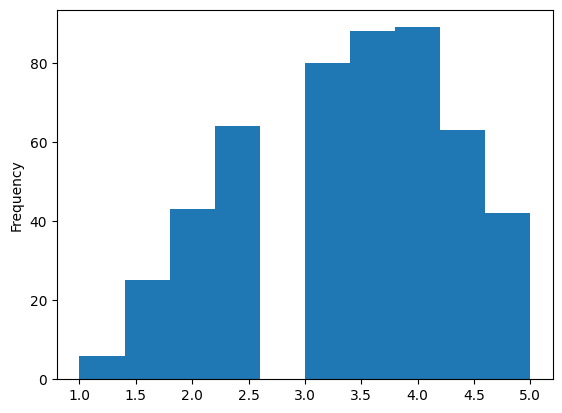

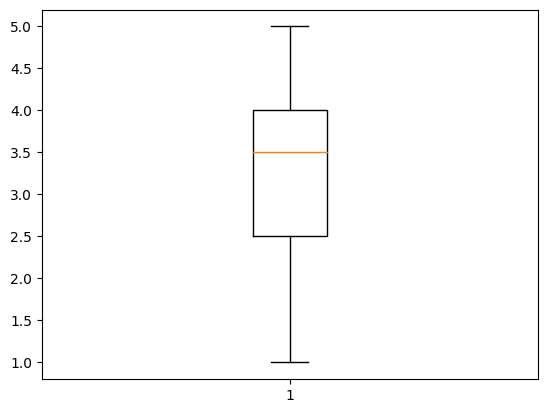

Number of upper outliers:  0
Number of lower outliers:  0
Percentage of outliers:  0.0

Variable:  lor
Describe: 
count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: lor, dtype: float64
Mode:  0    3.0
Name: lor, dtype: float64
Range:  4.0
IQR:  1.0
Variance:  0.8564569138276554
Standard Deviation:  0.9254495738978193
Skew:  -0.1452903146082398
Kurtosis:  -0.7457485105986423


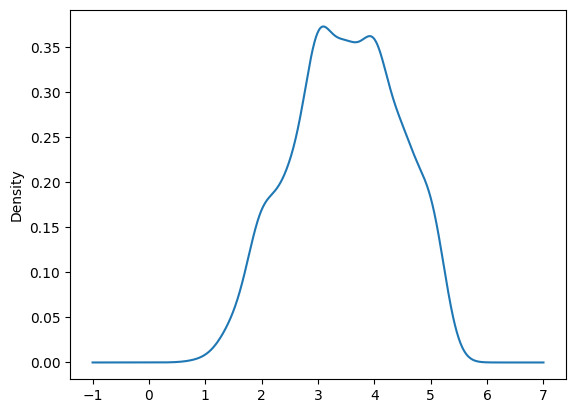

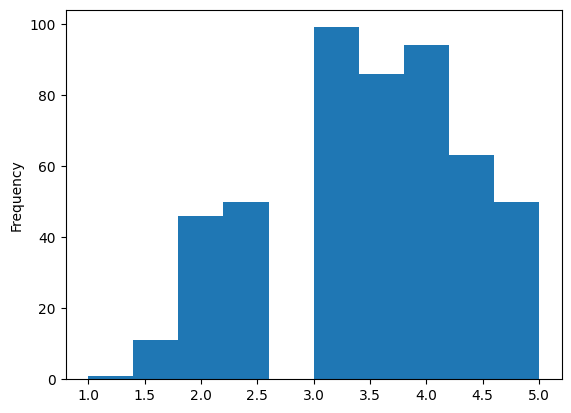

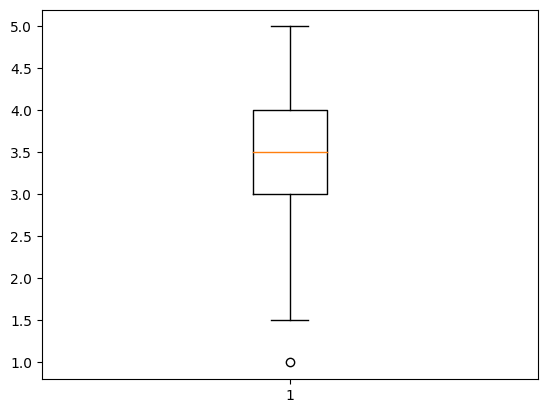

Number of upper outliers:  0
Number of lower outliers:  1
Percentage of outliers:  0.002

Variable:  cgpa
Describe: 
count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: cgpa, dtype: float64
Mode:  0    8.00
1    8.76
Name: cgpa, dtype: float64
Range:  3.12
IQR:  0.9124999999999979
Variance:  0.36579852344689373
Standard Deviation:  0.6048128003332054
Skew:  -0.026612517318359303
Kurtosis:  -0.5612783980560527


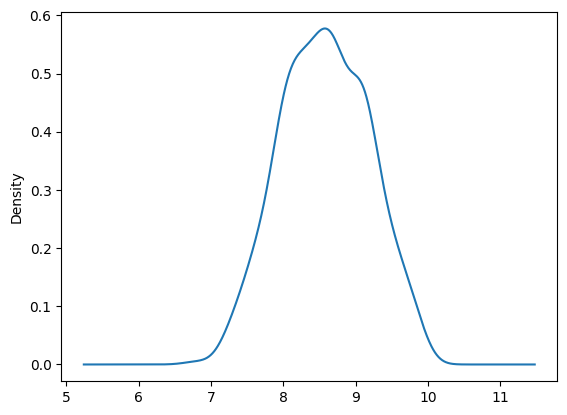

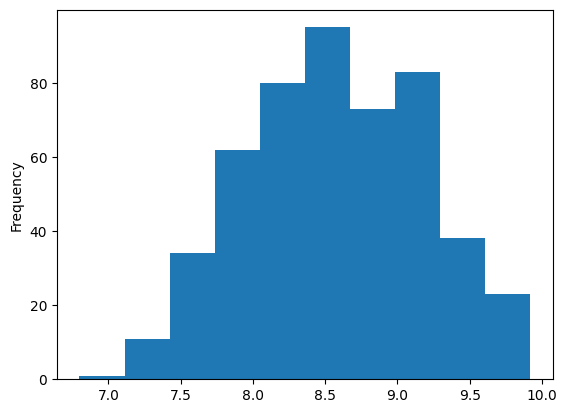

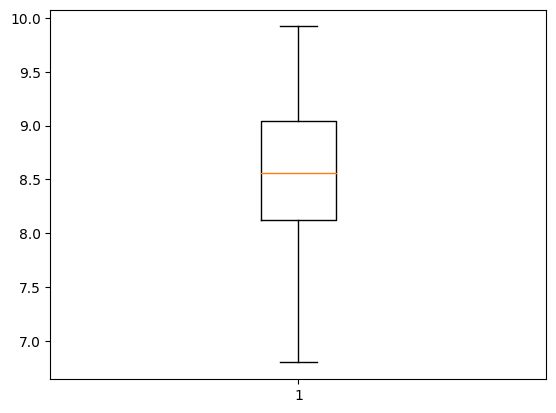

Number of upper outliers:  0
Number of lower outliers:  0
Percentage of outliers:  0.0

Variable:  chance_of_admit
Describe: 
count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: chance_of_admit, dtype: float64
Mode:  0    0.71
Name: chance_of_admit, dtype: float64
Range:  0.6299999999999999
IQR:  0.18999999999999995
Variance:  0.019920613627254505
Standard Deviation:  0.14114040395030228
Skew:  -0.289966210041158
Kurtosis:  -0.4546817998465431


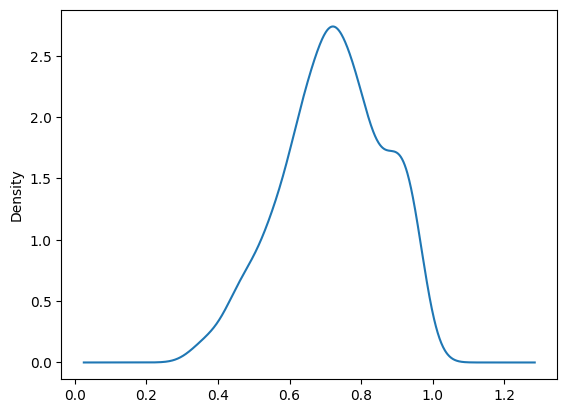

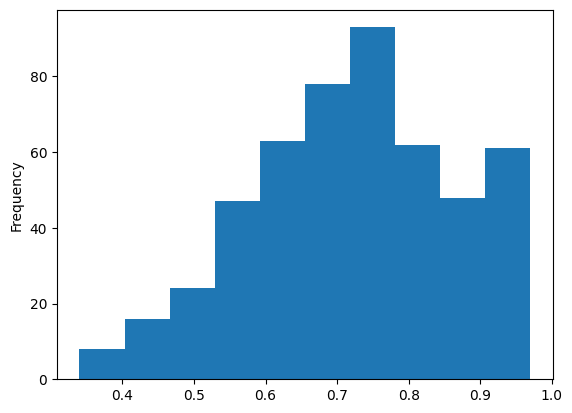

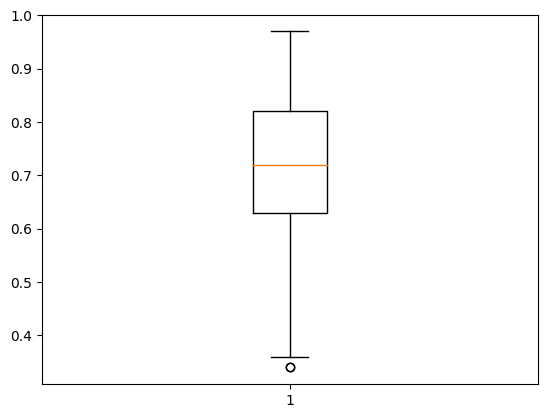

Number of upper outliers:  0
Number of lower outliers:  2
Percentage of outliers:  0.004

Variable:  gre_score_scaled
Describe: 
count    5.000000e+02
mean     1.762146e-15
std      1.001002e+00
min     -2.346008e+00
25%     -7.508077e-01
50%      4.679255e-02
75%      7.557706e-01
max      2.085104e+00
Name: gre_score_scaled, dtype: float64
Mode:  0   -0.396319
Name: gre_score_scaled, dtype: float64
Range:  4.4311126755730434
IQR:  1.5065783096948349
Variance:  1.002004008016032
Standard Deviation:  1.0010015025043828
Skew:  -0.03984185809159609
Kurtosis:  -0.7110644625938414


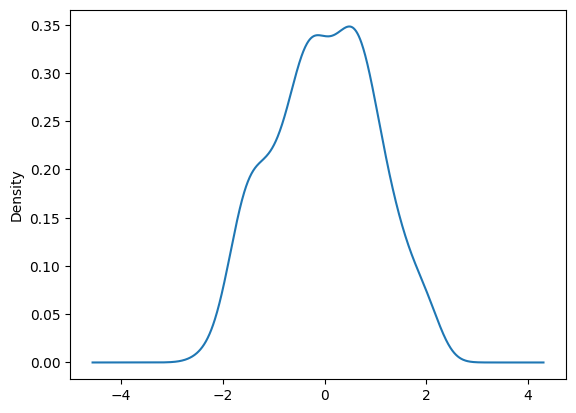

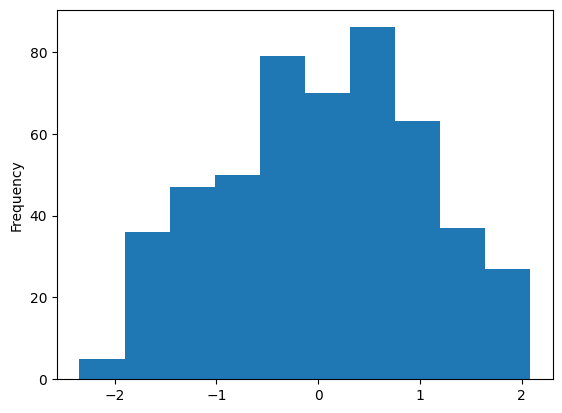

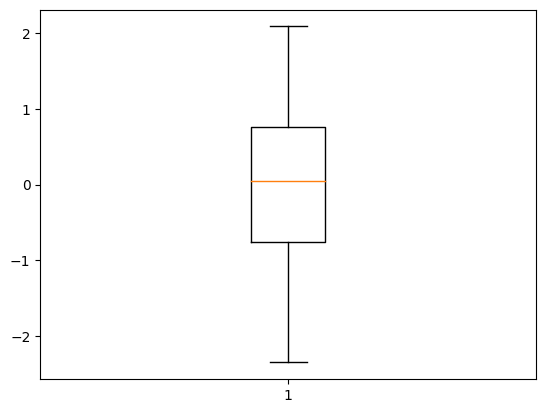

Number of upper outliers:  0
Number of lower outliers:  0
Percentage of outliers:  0.0

Variable:  toefl_score_scaled
Describe: 
count    5.000000e+02
mean     1.136868e-15
std      1.001002e+00
min     -2.500419e+00
25%     -6.899523e-01
50%     -3.160087e-02
75%      7.913384e-01
max      2.108041e+00
Name: toefl_score_scaled, dtype: float64
Mode:  0    0.462163
Name: toefl_score_scaled, dtype: float64
Range:  4.608459709912461
IQR:  1.481290621043291
Variance:  1.0020040080160324
Standard Deviation:  1.001001502504383
Skew:  0.0956009723572594
Kurtosis:  -0.6532454042173876


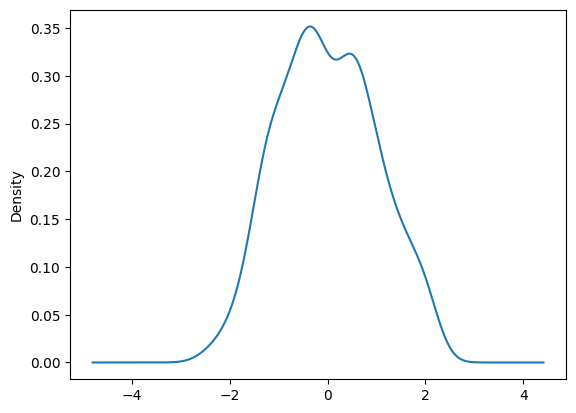

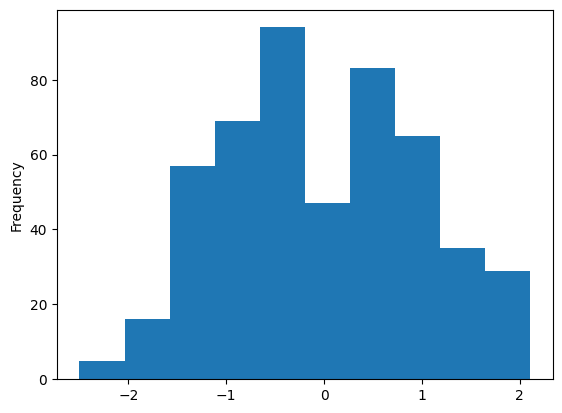

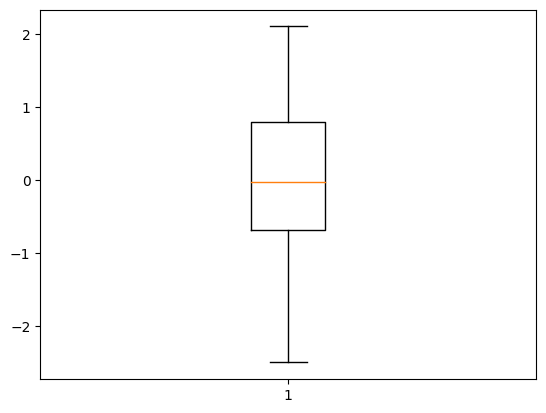

Number of upper outliers:  0
Number of lower outliers:  0
Percentage of outliers:  0.0



In [ ]:
for col in num_cols:
  print('Variable: ',col)
  univariate_analysis_numerical_variable(df,df[col])
  check_outliers(df, df[col])
  print()

**Comment:**

  * **sop:** Most frequent value: 4, IQR: 1.5, std: 0.99, skewness: -0.22 (not symmetric, left-tailed distribution), kurtosis: -0.7 (fairly flat), 0 outlier
  * **lor:** Most frequent value: 3, IQR: 1.0, std: 0.92, skewness: -0.14 (not symmetric, left-tailed distribution), kurtosis: -0.74 (fairly flat), 1 outlier
  * **cgpa:** Most frequent value: 8, IQR: 0.91, std: 0.6, skewness: -0.02 (not symmetric, left-tailed distribution), kurtosis: -0.5 (fairly flat), 0 outlier
  * **chance_of_admit:** Most frequent value: 0.71, IQR: 0.18, std: 0.14, skewness: -0.28 (not symmetric, left-tailed distribution), kurtosis: -0.45 (fairly flat), 2 outliers
  * **gre_score_scaled:** Most frequent value: -0.39, IQR: 1.5, std: 1, skewness: -0.03 (not symmetric, left-tailed distribution), kurtosis: -0.71 (fairly flat), 0 outlier
  * **toefl_score_scaled:** Most frequent value: 0.46, IQR: 1.48, std: 1, skewness: 0.09 (not symmetric, right-tailed distribution), kurtosis: -0.65 (fairly flat), 0 outlier

=> Overall, all these numerical variables are pretty similar to normal distribution (reflected by skewness & kurtosis values are very close to 0). There is no significant number of outliers to pay attention to

# Section 4: Bivariate Analysis

## Input - Output

### Numerical - Categorical

In [ ]:
  # ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

University rating - Chance of Admit
*   H0: There is no influence of University rating to Chance of Admit
*   H1: There is an influence of University rating to Chance of Admit

Research - Chance of Admit
*   H0: There is no influence of Research to Chance of Admit
*   H1: There is an influence of Research to Chance of Admit

In [ ]:
def variables_cont_cat(df, dep_col, indep_col):
  df_sub = df[[dep_col,indep_col]]
  sns.boxplot(data=df_sub,x=indep_col,y=dep_col)
  plt.show()
  chuoi = str(dep_col) + ' ~ ' + str(indep_col)
  model = ols(chuoi, data=df_sub).fit()
  anova_table = sm.stats.anova_lm(model,typ=2)
  print('ANOVA Table: ',anova_table)

2 Variables:  chance_of_admit  and  university_rating


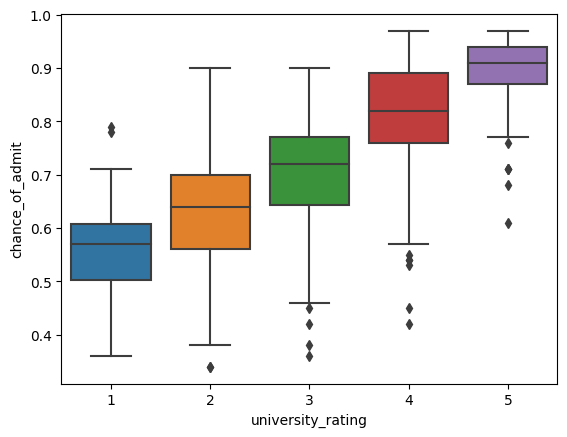

ANOVA Table:                       sum_sq     df           F        PR(>F)
university_rating  4.766543    4.0  114.008043  7.753395e-69
Residual           5.173843  495.0         NaN           NaN

2 Variables:  chance_of_admit  and  research


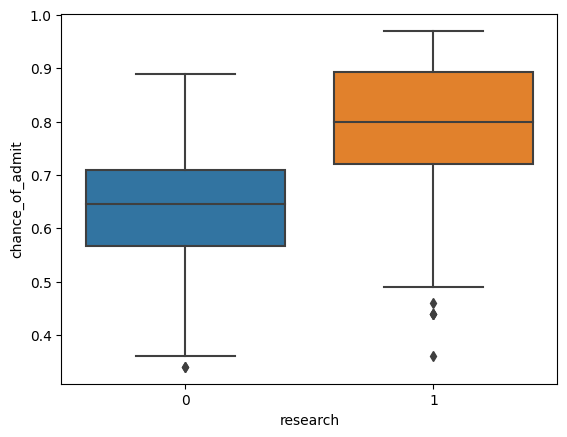

ANOVA Table:              sum_sq     df           F        PR(>F)
research  2.961988    1.0  211.376629  3.595494e-40
Residual  6.978398  498.0         NaN           NaN



In [ ]:
dep_col = 'chance_of_admit'
for i in range(0, len(cat_cols)):
  indep_col = cat_cols[i]
  print('2 Variables: ',dep_col,' and ',indep_col)
  variables_cont_cat(df, dep_col, indep_col)
  print()

**Comment:**

  * **chance_of_admit  and  university_rating:** p-value (7.753395e-69) < 0.05 => Reject H0 => There's a significant influence of University_rating to Chance_of_admit
  * **chance_of_admit  and  research:** p-value (3.595494e-40) < 0.05 => Reject H0 => There's a significant influence of Research to Chance_of_admit

### Numerical - Numerical

Correlation between 2 variables: sop and chance_of_admit
                      sop  chance_of_admit
sop              1.000000         0.684137
chance_of_admit  0.684137         1.000000
Pearson Correlation between 2 variables: sop and chance_of_admit
PearsonRResult(statistic=0.6841365241316724, pvalue=2.885907453454975e-70)
Spearman Correlation between 2 variables: sop and chance_of_admit
SignificanceResult(statistic=0.7027993934494721, pvalue=1.1336315351749534e-75)


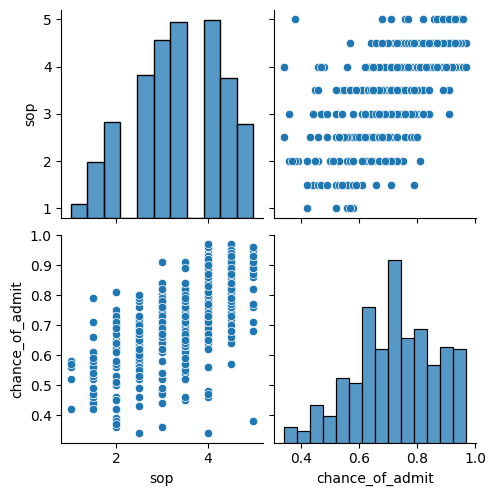


Correlation between 2 variables: lor and chance_of_admit
                      lor  chance_of_admit
lor              1.000000         0.645365
chance_of_admit  0.645365         1.000000
Pearson Correlation between 2 variables: lor and chance_of_admit
PearsonRResult(statistic=0.6453645135280106, pvalue=3.0699323203003144e-60)
Spearman Correlation between 2 variables: lor and chance_of_admit
SignificanceResult(statistic=0.6436271408925764, pvalue=7.989632657725141e-60)


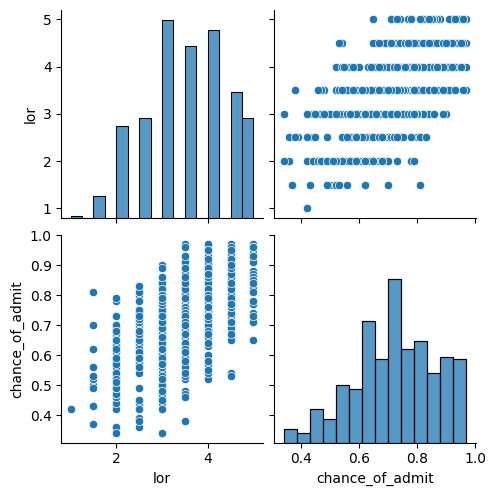


Correlation between 2 variables: cgpa and chance_of_admit
                     cgpa  chance_of_admit
cgpa             1.000000         0.882413
chance_of_admit  0.882413         1.000000
Pearson Correlation between 2 variables: cgpa and chance_of_admit
PearsonRResult(statistic=0.8824125749045744, pvalue=3.3965448587112374e-165)
Spearman Correlation between 2 variables: cgpa and chance_of_admit
SignificanceResult(statistic=0.8887856599613074, pvalue=7.372294266325021e-171)


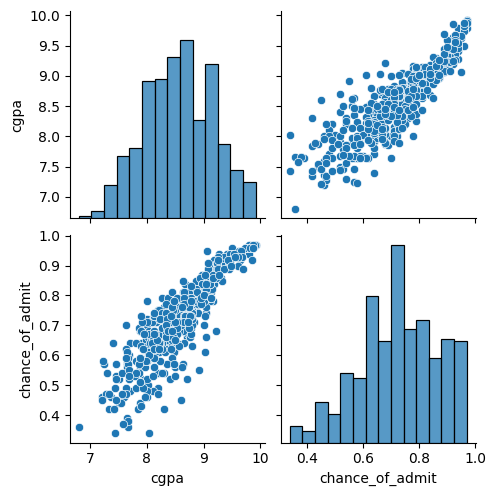


Correlation between 2 variables: gre_score_scaled and chance_of_admit
                  gre_score_scaled  chance_of_admit
gre_score_scaled          1.000000         0.810351
chance_of_admit           0.810351         1.000000
Pearson Correlation between 2 variables: gre_score_scaled and chance_of_admit
PearsonRResult(statistic=0.8103506354632597, pvalue=1.088403686248188e-117)
Spearman Correlation between 2 variables: gre_score_scaled and chance_of_admit
SignificanceResult(statistic=0.8222011595365538, pvalue=5.734552105475668e-124)


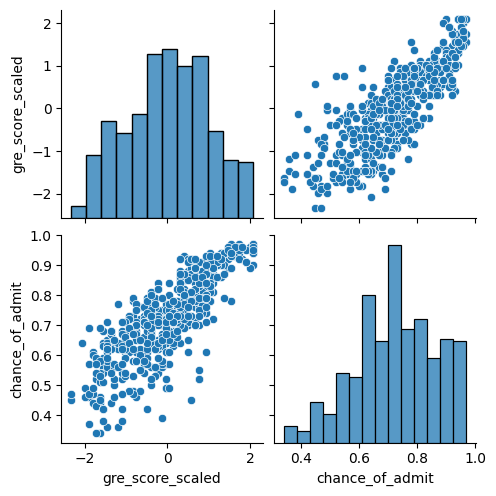


Correlation between 2 variables: toefl_score_scaled and chance_of_admit
                    toefl_score_scaled  chance_of_admit
toefl_score_scaled            1.000000         0.792228
chance_of_admit               0.792228         1.000000
Pearson Correlation between 2 variables: toefl_score_scaled and chance_of_admit
PearsonRResult(statistic=0.792227614305083, pvalue=6.729926762330067e-109)
Spearman Correlation between 2 variables: toefl_score_scaled and chance_of_admit
SignificanceResult(statistic=0.7936341632036854, pvalue=1.504956427966445e-109)


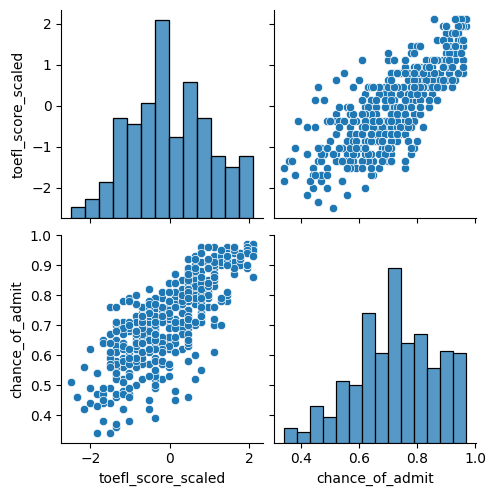

In [ ]:
col2 = 'chance_of_admit'
num_cols.remove('chance_of_admit')
for i in range (0,len(num_cols)):
  col1 = num_cols[i]
  print('Correlation between 2 variables: {} and {}'.format(col1,col2))
  print(df[[col1,col2]].corr())
  print('Pearson Correlation between 2 variables: {} and {}'.format(col1,col2))
  print(stats.pearsonr(df[col1],df[col2]))
  print('Spearman Correlation between 2 variables: {} and {}'.format(col1,col2))
  print(stats.spearmanr(df[col1],df[col2]))
  sns.pairplot(df[[col1,col2]])
  plt.show()
  print()

**Comment:**

  * **sop and chance_of_admit:** statistic: 0.68 => Strong + Positive Correlation
  * **lor and chance_of_admit:** statistic: 0.64 => Strong + Positive Correlation
  * **cgpa and chance_of_admit:** statistic: 0.88 => Strong + Positive
  * **gre_score_scaled and chance_of_admit:** statistic: 0.81 => Strong + Positive Correlation
  * **toefl_score_scaled and chance_of_admit:** statistic: 0.79 => Strong + Positive Correlation

## Input - Input

### Numerical - Numerical

Correlation between 2 variables: sop and lor
          sop       lor
sop  1.000000  0.663707
lor  0.663707  1.000000
Pearson Correlation between 2 variables: sop and lor
PearsonRResult(statistic=0.6637068525149349, pvalue=8.52993586339688e-65)
Spearman Correlation between 2 variables: sop and lor
SignificanceResult(statistic=0.6626528953712509, pvalue=1.590322408256286e-64)


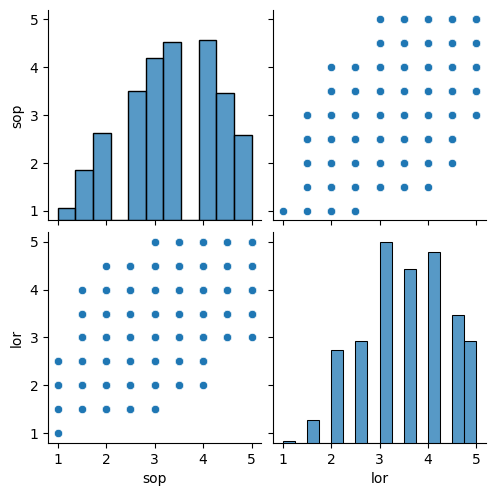


Correlation between 2 variables: sop and cgpa
           sop      cgpa
sop   1.000000  0.712154
cgpa  0.712154  1.000000
Pearson Correlation between 2 variables: sop and cgpa
PearsonRResult(statistic=0.7121543243652496, pvalue=1.5228065438624835e-78)
Spearman Correlation between 2 variables: sop and cgpa
SignificanceResult(statistic=0.717383992114305, pvalue=3.3613840896999585e-80)


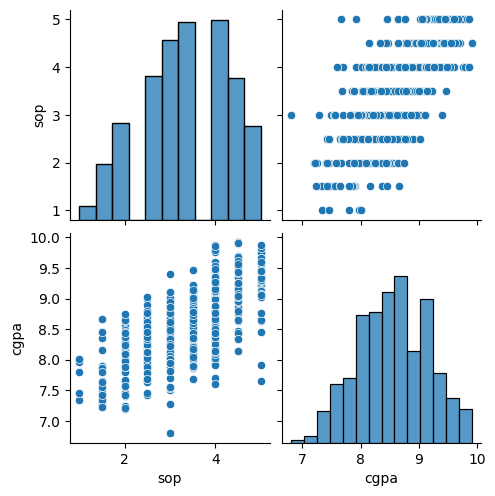


Correlation between 2 variables: sop and gre_score_scaled
                       sop  gre_score_scaled
sop               1.000000          0.613498
gre_score_scaled  0.613498          1.000000
Pearson Correlation between 2 variables: sop and gre_score_scaled
PearsonRResult(statistic=0.6134976734624102, pvalue=5.001042142760622e-53)
Spearman Correlation between 2 variables: sop and gre_score_scaled
SignificanceResult(statistic=0.6206884602107177, pvalue=1.3933549331459453e-54)


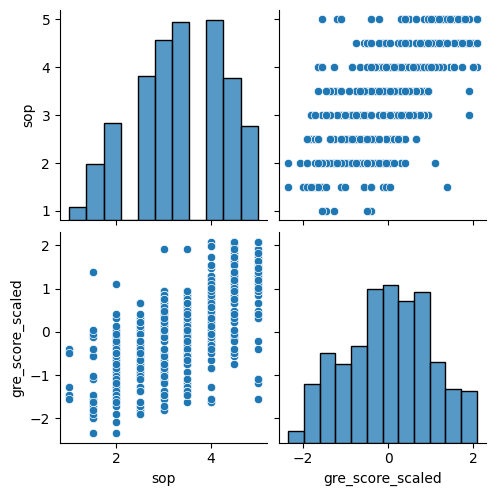


Correlation between 2 variables: sop and toefl_score_scaled
                        sop  toefl_score_scaled
sop                 1.00000             0.64441
toefl_score_scaled  0.64441             1.00000
Pearson Correlation between 2 variables: sop and toefl_score_scaled
PearsonRResult(statistic=0.6444103878875812, pvalue=5.195055562082617e-60)
Spearman Correlation between 2 variables: sop and toefl_score_scaled
SignificanceResult(statistic=0.6447145232321638, pvalue=4.3939473013969227e-60)


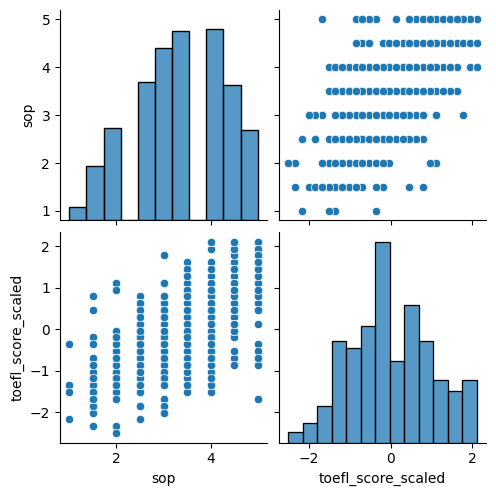


Correlation between 2 variables: lor and cgpa
           lor      cgpa
lor   1.000000  0.637469
cgpa  0.637469  1.000000
Pearson Correlation between 2 variables: lor and cgpa
PearsonRResult(statistic=0.6374692057544705, pvalue=2.2562193821060344e-58)
Spearman Correlation between 2 variables: lor and cgpa
SignificanceResult(statistic=0.6395632635309546, pvalue=7.306805480340624e-59)


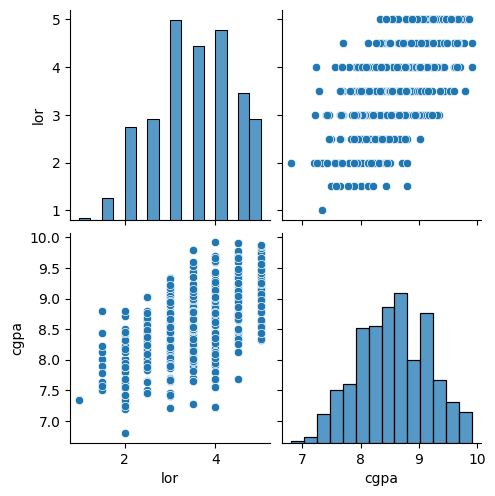


Correlation between 2 variables: lor and gre_score_scaled
                       lor  gre_score_scaled
lor               1.000000          0.524679
gre_score_scaled  0.524679          1.000000
Pearson Correlation between 2 variables: lor and gre_score_scaled
PearsonRResult(statistic=0.5246793925817073, pvalue=1.0282157884826131e-36)
Spearman Correlation between 2 variables: lor and gre_score_scaled
SignificanceResult(statistic=0.5143515202411133, pvalue=4.074735435333463e-35)


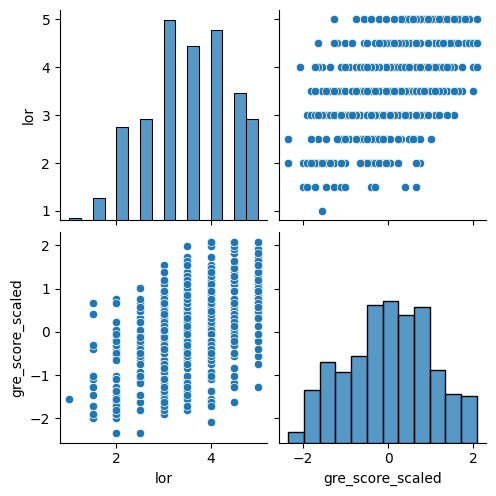


Correlation between 2 variables: lor and toefl_score_scaled
                         lor  toefl_score_scaled
lor                 1.000000            0.541563
toefl_score_scaled  0.541563            1.000000
Pearson Correlation between 2 variables: lor and toefl_score_scaled
PearsonRResult(statistic=0.5415632950080224, pvalue=1.898168943995298e-39)
Spearman Correlation between 2 variables: lor and toefl_score_scaled
SignificanceResult(statistic=0.5234344042905895, pvalue=1.613013647454617e-36)


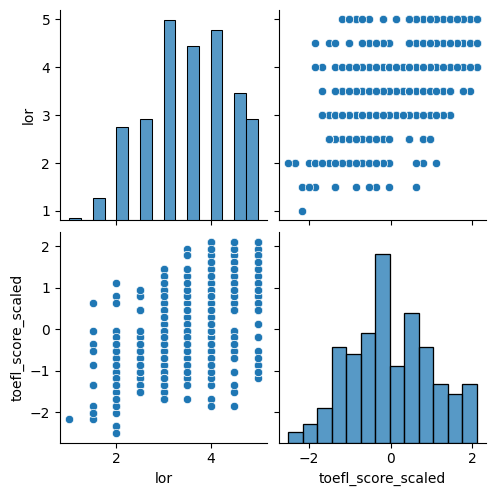


Correlation between 2 variables: cgpa and gre_score_scaled
                      cgpa  gre_score_scaled
cgpa              1.000000          0.825878
gre_score_scaled  0.825878          1.000000
Pearson Correlation between 2 variables: cgpa and gre_score_scaled
PearsonRResult(statistic=0.8258779536403552, pvalue=5.1860762739187986e-126)
Spearman Correlation between 2 variables: cgpa and gre_score_scaled
SignificanceResult(statistic=0.829250722579067, pvalue=6.272247768604007e-128)


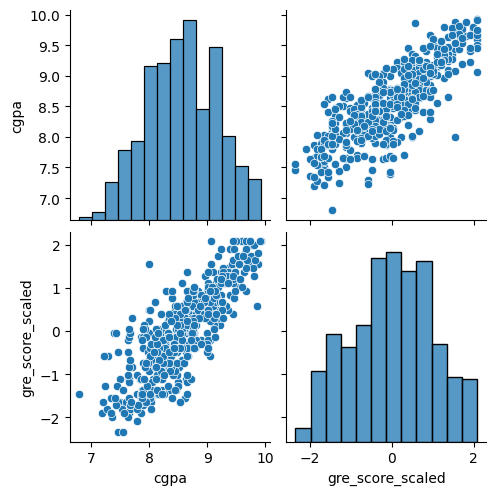


Correlation between 2 variables: cgpa and toefl_score_scaled
                        cgpa  toefl_score_scaled
cgpa                1.000000            0.810574
toefl_score_scaled  0.810574            1.000000
Pearson Correlation between 2 variables: cgpa and toefl_score_scaled
PearsonRResult(statistic=0.8105735363036223, pvalue=8.371647139357592e-118)
Spearman Correlation between 2 variables: cgpa and toefl_score_scaled
SignificanceResult(statistic=0.8094847275732393, pvalue=3.007029758137662e-117)


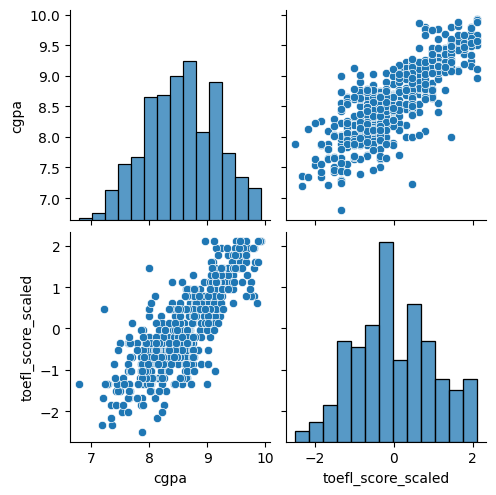


Correlation between 2 variables: gre_score_scaled and toefl_score_scaled
                    gre_score_scaled  toefl_score_scaled
gre_score_scaled              1.0000              0.8272
toefl_score_scaled            0.8272              1.0000
Pearson Correlation between 2 variables: gre_score_scaled and toefl_score_scaled
PearsonRResult(statistic=0.8272004035317203, pvalue=9.289545296036696e-127)
Spearman Correlation between 2 variables: gre_score_scaled and toefl_score_scaled
SignificanceResult(statistic=0.8238534081232208, pvalue=7.01498176501869e-125)


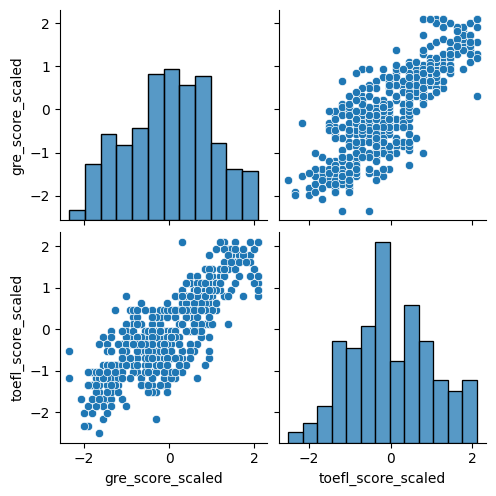

In [ ]:
for i in range (0,len(num_cols)):
  col1 = num_cols[i]
  for j in range (i+1, len(num_cols)):
    col2 = num_cols[j]
    print('Correlation between 2 variables: {} and {}'.format(col1,col2))
    print(df[[col1,col2]].corr())
    print('Pearson Correlation between 2 variables: {} and {}'.format(col1,col2))
    print(stats.pearsonr(df[col1],df[col2]))
    print('Spearman Correlation between 2 variables: {} and {}'.format(col1,col2))
    print(stats.spearmanr(df[col1],df[col2]))
    sns.pairplot(df[[col1,col2]])
    plt.show()
    print()

**Comment:**

  * **sop and lor:** statistic: 0.66 => Strong + Positive Correlation
  * **sop and cgpa:** statistic: 0.71 => Strong + Positive Correlation
  * **sop and gre_score_scaled:** statistic: 0.61 => Strong + Positive Correlation
  * **sop and toefl_score_scaled:** statistic: 0.64 => Strong + Positive Correlation
  * **lor and cgpa:** statistic: 0.63 => Strong + Positive Correlation
  * **lor and gre_score_scaled:** statistic: 0.52 => Strong + Positive Correlation
  * **lor and toefl_score_scaled:** statistic: 0.54 => Strong + Positive Correlation
  * **cgpa and gre_score_scaled:** statistic: 0.82 => Strong + Positive Correlation
  * **cgpa and toefl_score_scaled:** statistic: 0.81 => Strong + Positive Correlation
  * **gre_score_scaled and toefl_score_scaled:** statistic: 0.82 => Strong + Positive Correlation

### Categorical - Categorical

University rating - Research
*   H0: There is no influence of University rating to Research
*   H1: There is an influence of University rating to Research

In [ ]:
  # Chi-squared

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import sem

In [ ]:
def categorical_categorical(feature1,feature2):
  # contingency table
  table_FB = pd.crosstab(feature1,feature2)
  print(table_FB)
  table_FB.plot(kind='bar', stacked=True, figsize=(5,6), rot=0)
  plt.show()

  # chi-squared test
  stat, p, dof, expected = chi2_contingency(table_FB)
  print('dof = ',dof)
  print('p = ',p)
  # interpret test-statistic
  prob=0.95
  critical = chi2.ppf(prob,dof)
  print('probability = {}, critical = {}, stat = {}'.format(prob,critical,stat))
  # interpret p-value
  alpha = 1 - prob
  print('significance = {}, p = {}'.format(alpha,p))
  if p <= alpha:
    print('Reject H0 (Dependent)')
    x1 = feature1.name
    x2 = feature2.name
    chuoi = x1 + ' and ' + x2
    return chuoi
  else:
    print('Fail to reject H0 (Independent)')

2 Variables: university_rating and research
research            0   1
university_rating        
1                  24  10
2                  89  37
3                  75  87
4                  23  82
5                   9  64


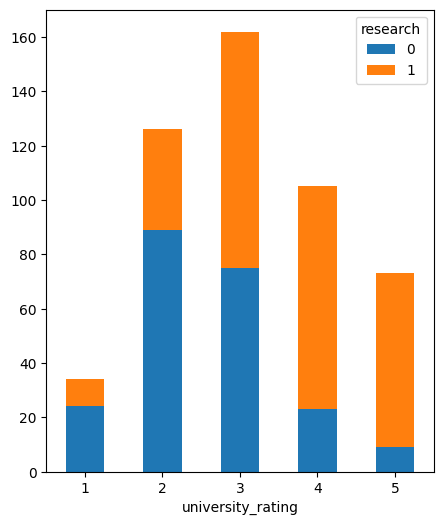

dof =  4
p =  4.4936229585994394e-20
probability = 0.95, critical = 9.487729036781154, stat = 96.90000948490646
significance = 0.050000000000000044, p = 4.4936229585994394e-20
Reject H0 (Dependent)



In [ ]:
for i in range(0, len(cat_cols)):
  col1 = cat_cols[i]
  for j in range (i+1, len(cat_cols)):
    col2 = cat_cols[j]
    print('2 Variables: {} and {}'.format(col1,col2))
    categorical_categorical(df[col1],df[col2])
    print()

**Comment:**

  * **university_rating and research:** p-value (4.49e-20) < 0.05 => Reject H0 => 2 variables are dependent

### Numerical - Categorical

SOP - University rating
*   H0: There is no influence of SOP to University rating
*   H1: There is an influence of SOP to University rating

SOP - Research
*   H0: There is no influence of SOP to Research
*   H1: There is an influence of SOP to Research

LOR - University rating
*   H0: There is no influence of LOR to University rating
*   H1: There is an influence of LOR to University rating

LOR - Research
*   H0: There is no influence of LOR to Research
*   H1: There is an influence of LOR to Research

CGPA - University rating
*   H0: There is no influence of CGPA to University rating
*   H1: There is an influence of CGPA to University rating

CGPA - Research
*   H0: There is no influence of CGPA to Research
*   H1: There is an influence of CGPA to Research

Gre_score_scaled - University rating
*   H0: There is no influence of Gre_score_scaled to University rating
*   H1: There is an influence of Gre_score_scaled to University rating

Gre_score_scaled - Research
*   H0: There is no influence of Gre_score_scaled to Research
*   H1: There is an influence of Gre_score_scaled to Research

Toefl_score_scaled - University rating
*   H0: There is no influence of Toefl_score_scaled to University rating
*   H1: There is an influence of Toefl_score_scaled to University rating

Toefl_score_scaled - Research
*   H0: There is no influence of Toefl_score_scaled to Research
*   H1: There is an influence of Toefl_score_scaled to Research

2 Variables: sop and university_rating


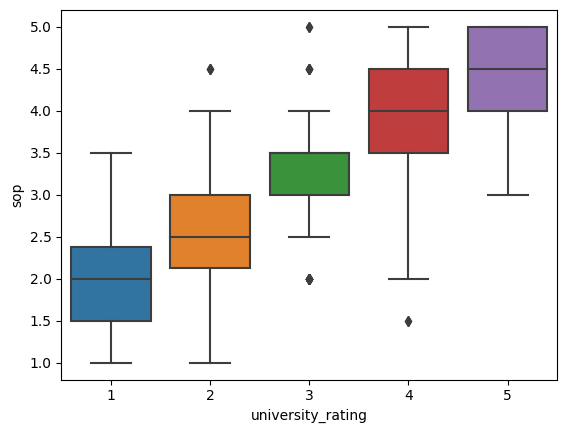

ANOVA Table:                        sum_sq     df           F        PR(>F)
university_rating  261.09098    4.0  141.109599  2.147563e-80
Residual           228.97102  495.0         NaN           NaN

2 Variables: sop and research


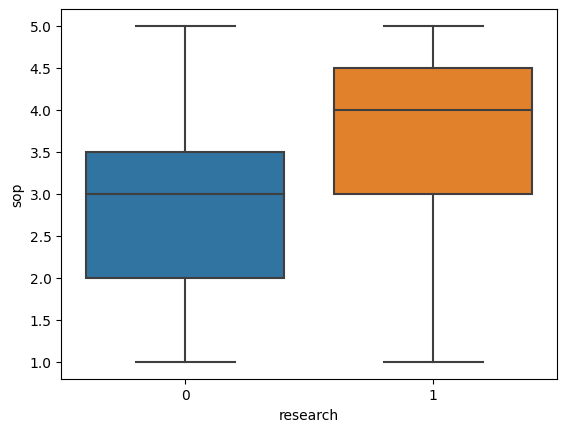

ANOVA Table:                sum_sq     df          F        PR(>F)
research   81.624013    1.0  99.522473  1.721791e-21
Residual  408.437987  498.0        NaN           NaN

2 Variables: lor and university_rating


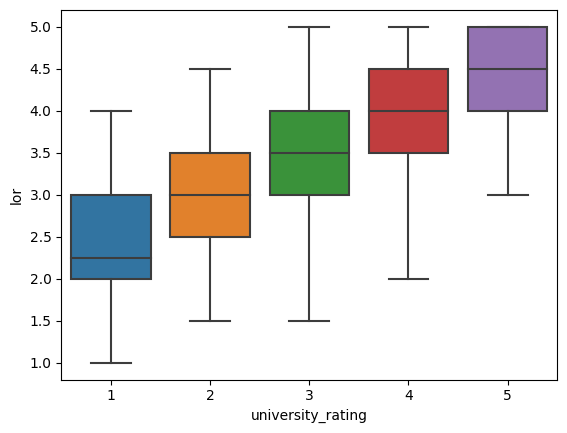

ANOVA Table:                         sum_sq     df          F        PR(>F)
university_rating  158.585478    4.0  73.013158  1.323085e-48
Residual           268.786522  495.0        NaN           NaN

2 Variables: lor and research


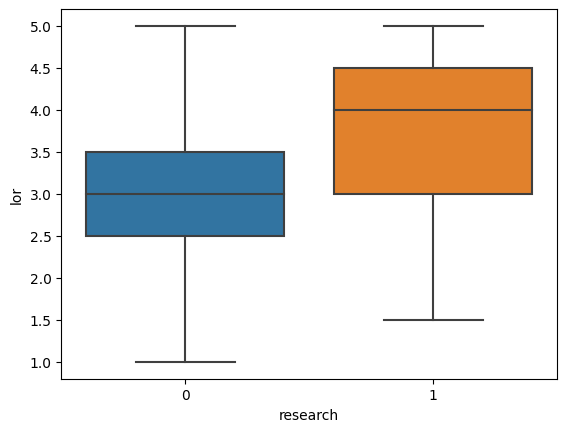

ANOVA Table:                sum_sq     df          F        PR(>F)
research   59.308688    1.0  80.246321  6.617861e-18
Residual  368.063312  498.0        NaN           NaN

2 Variables: cgpa and university_rating


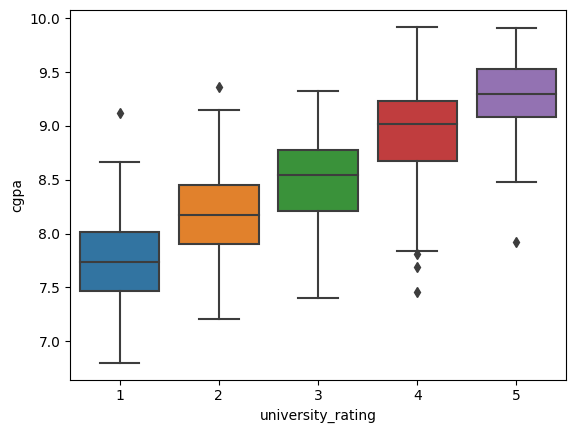

ANOVA Table:                        sum_sq     df           F        PR(>F)
university_rating  91.106997    4.0  123.317582  6.002371e-73
Residual           91.426467  495.0         NaN           NaN

2 Variables: cgpa and research


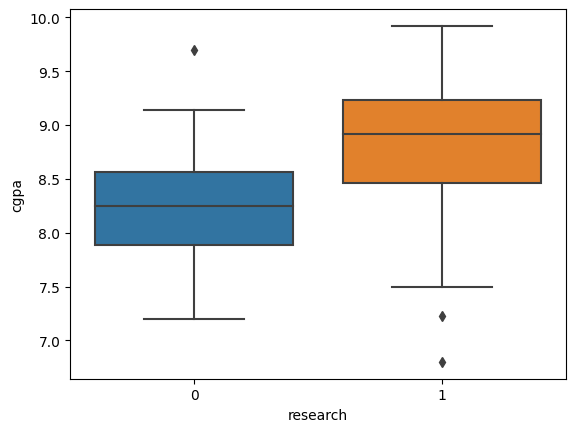

ANOVA Table:                sum_sq     df           F        PR(>F)
research   45.872981    1.0  167.164232  3.558468e-33
Residual  136.660482  498.0         NaN           NaN

2 Variables: gre_score_scaled and university_rating


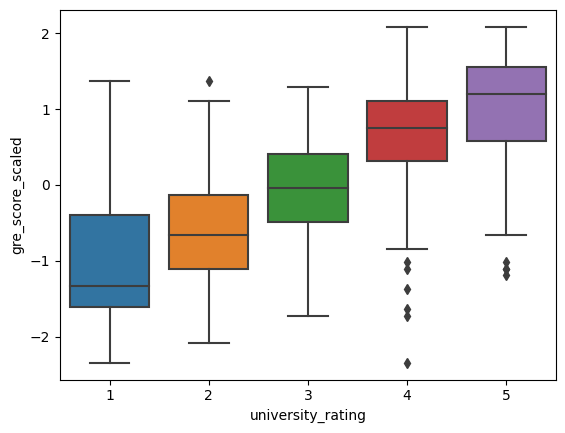

ANOVA Table:                         sum_sq     df          F        PR(>F)
university_rating  204.852979    4.0  85.891282  2.237373e-55
Residual           295.147021  495.0        NaN           NaN

2 Variables: gre_score_scaled and research


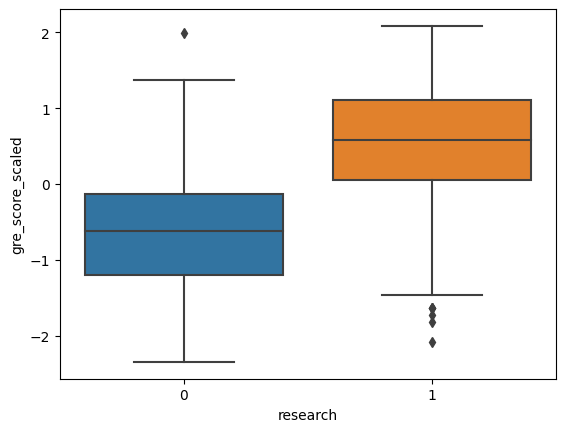

ANOVA Table:                sum_sq     df           F        PR(>F)
research  158.708722    1.0  231.582078  3.199521e-43
Residual  341.291278  498.0         NaN           NaN

2 Variables: toefl_score_scaled and university_rating


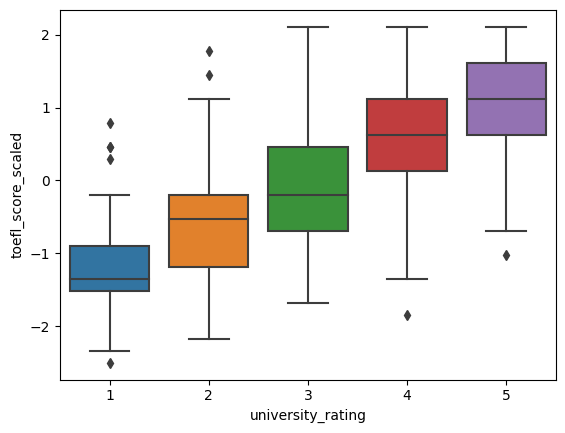

ANOVA Table:                         sum_sq     df          F        PR(>F)
university_rating  213.845437    4.0  92.479297  1.102503e-58
Residual           286.154563  495.0        NaN           NaN

2 Variables: toefl_score_scaled and research


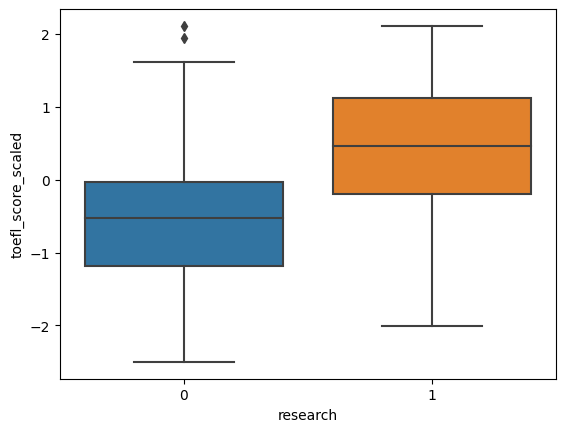

ANOVA Table:                sum_sq     df           F        PR(>F)
research  109.050132    1.0  138.910306  1.885100e-28
Residual  390.949868  498.0         NaN           NaN



In [ ]:
for i in range (0, len(num_cols)):
  dep_col = num_cols[i]
  for j in range(0,len(cat_cols)):
    indep_col = cat_cols[j]
    print('2 Variables: {} and {}'.format(dep_col,indep_col))
    variables_cont_cat(df, dep_col, indep_col)
    print()

**Comment:**

  * **SOP - University rating:** p-value < 0.05 => Reject H0 => There's an influence between SOP and University Rating
  * **SOP - Research:** p-value < 0.05 => Reject H0 => There's an influence between SOP and University Rating

  * **LOR - University rating:** p-value < 0.05 => Reject H0 => There's an influence between LOR and University Rating
  * **LOR - Research:** p-value < 0.05 => Reject H0 => There's an influence between LOR and University Rating

  * **CGPA - University rating:** p-value < 0.05 => Reject H0 => There's an influence between CGPA and University Rating
  * **CGPA - Research:** p-value < 0.05 => Reject H0 => There's an influence between CGPA and University Rating

  * **Gre_score_scaled - University rating:** p-value < 0.05 => Reject H0 => There's an influence between Gre_score_scaled and University Rating
  * **Gre_score_scaled - Research:** p-value < 0.05 => Reject H0 => There's an influence between Gre_score_scaled and University Rating

  * **Toefl_score_scaled - University rating:** p-value < 0.05 => Reject H0 => There's an influence between Toefl_score_scaled and University Rating
  * **Toefl_score_scaled - Research:** p-value < 0.05 => Reject H0 => There's an influence between Toefl_score_scaled and University Rating


**Recommend the following:**

Based on the statistical tests and analysis:

**For numerical variables:**
*   All numerical variables (sop, lor, cgpa, gre_scored_scaled, toelf_score_scale) have a significant influence on the target variable (chance_of_admit), displayed by Correlation Coefficient
*   They also show a strongly positive correlation with one another, demonstrated by Pearson & Spearman Correlation Coefficient

**For categorical variables:**

*   All categorical variables (university_rating, research) affect profoundly on the target variable (chance_of_admit), illustrated by the ANOVA test
*   They're also independent variables with each other, based on Chi Squared Test

# Section 5: Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = df.drop(['chance_of_admit'],axis=1)
y = df['chance_of_admit']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
regressors = [['Linear Regression:', LinearRegression()],
               ['Decision Tree Regression:', DecisionTreeRegressor()],
               ['Random Forest Regression:',RandomForestRegressor()],
              ['K Neighbors Regression:', KNeighborsRegressor()],
              ['Support Vector Regression:', SVR()]]
reg_pred=[]

for name,model in regressors:
  model = model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms=np.sqrt(mean_squared_error(y_test,y_pred))
  reg_pred.append(rms)
  print(name,rms)

Linear Regression: 0.06174827193517283
Decision Tree Regression: 0.08431686268673268
Random Forest Regression: 0.06669530918038132
K Neighbors Regression: 0.06965438488231257
Support Vector Regression: 0.06926582671650279


In [ ]:
y_ax = ['Linear Regression','Decision Tree Regression','Random Forest Regression','K Neighbors Regression','Support Vector Regression']
x_ax = reg_pred

<Axes: >

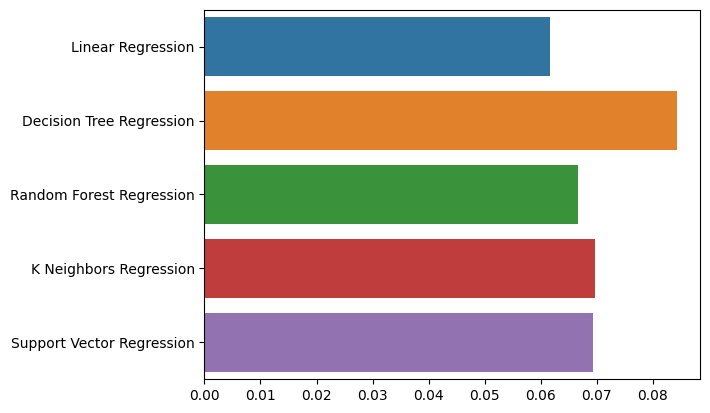

In [ ]:
sns.barplot(x=x_ax,y=y_ax)

**Comment**

The highest accuracy score for this problem is: **Decision Tree Regression**

# Section 6: Feature Evaluation

In [ ]:
  # Generate feature importances
classifier = DecisionTreeRegressor()
classifier.fit(X,y)
feature_name = X.columns

importance_frame = pd.DataFrame()
importance_frame['Features'] = feature_name
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by='Importance',ascending=True)

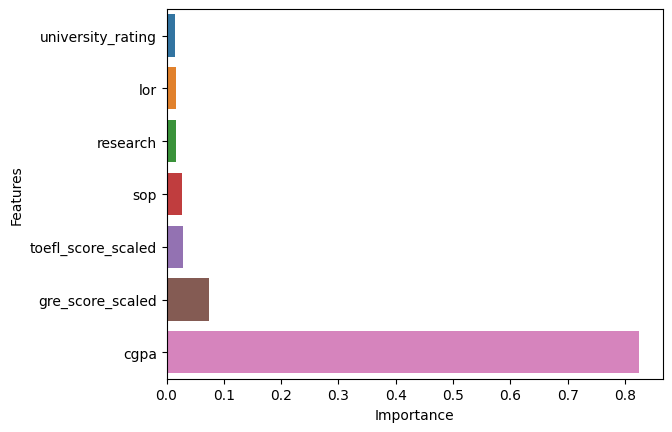

In [ ]:
  # Visualize important features
sns.barplot(data=importance_frame,y='Features',x='Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

**Comment**

From here, we can clearly see that CGPA plays the most important role in affecting the Chance of Admit